<Figure size 1500x1000 with 0 Axes>

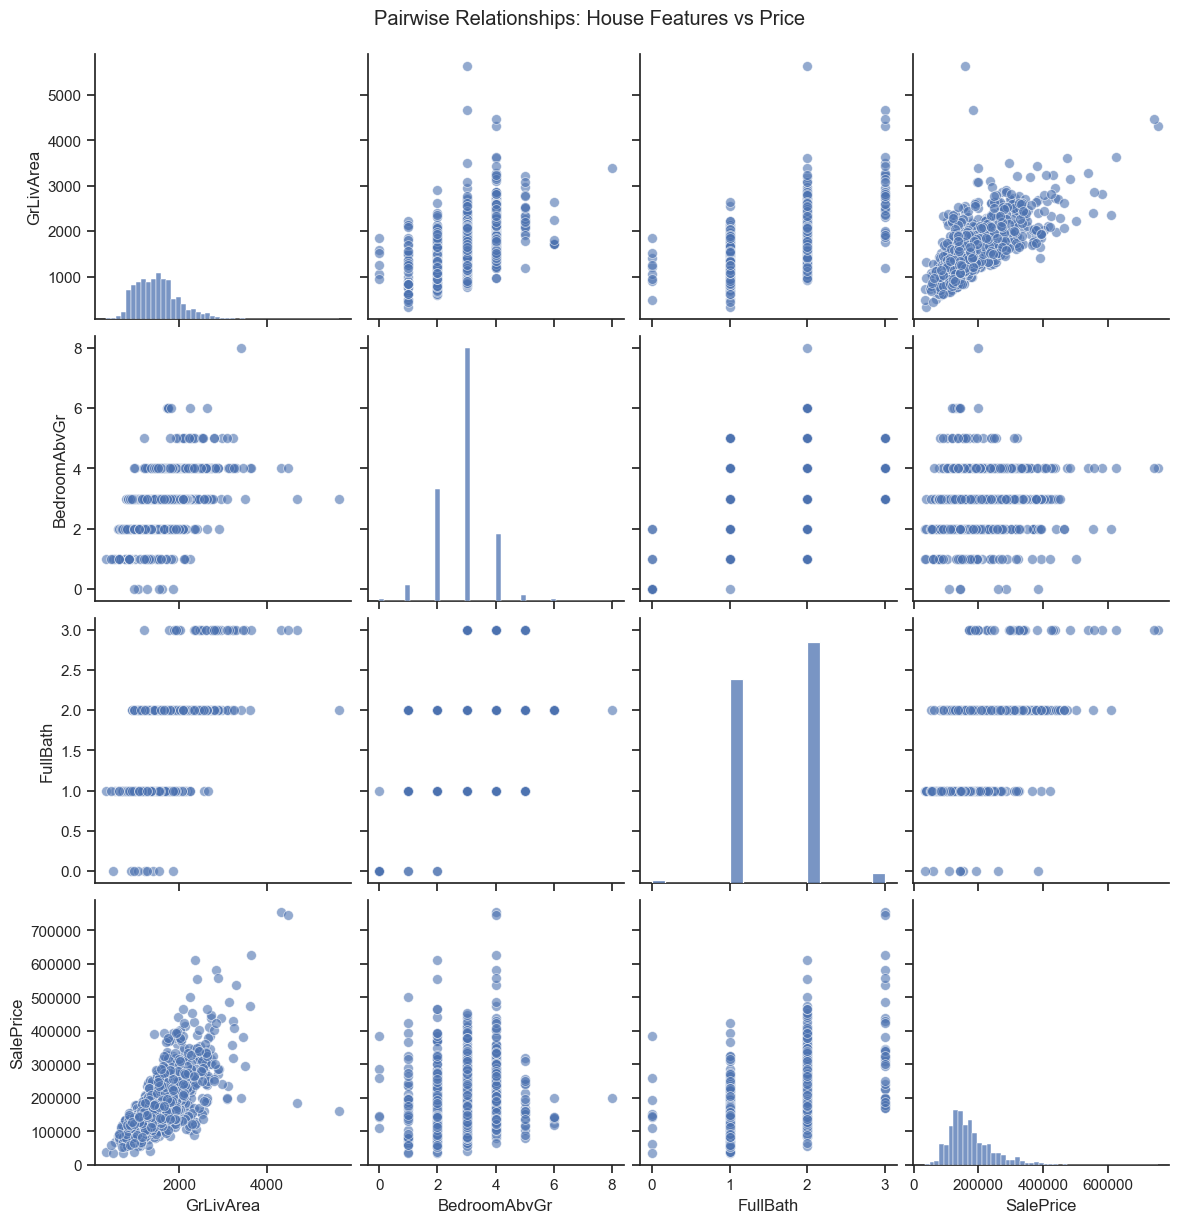

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")

selected_features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
subset = data[selected_features].dropna()

sns.set(style="ticks", color_codes=True)

plt.figure(figsize=(15, 10))
pairplot = sns.pairplot(subset, height=3, plot_kws={'alpha': 0.6, 's': 50})

pairplot.fig.suptitle("Pairwise Relationships: House Features vs Price", y=1.02)

pairplot.savefig("Final_Pairwise_HousePrice_Plot.png")

plt.show()


Mean Squared Error: 1682322529.890191
R² Score: 0.7806713189963357


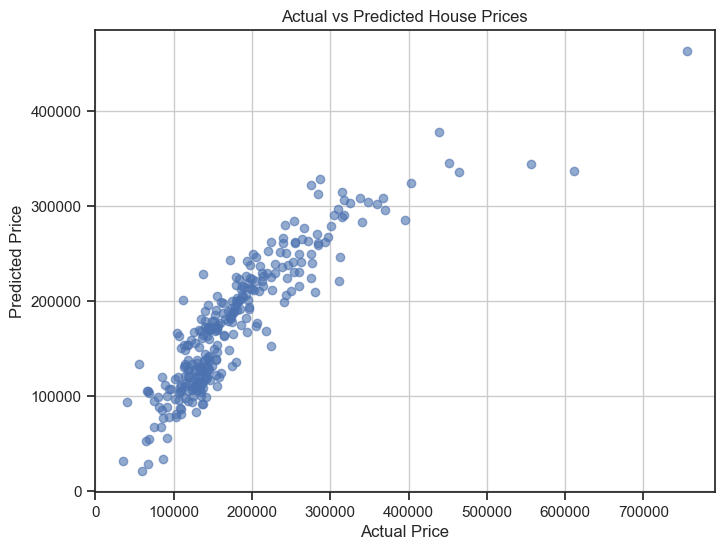

Cross-validated R² scores: [0.81224766 0.77049359 0.7594186  0.75518987 0.67896442]
Mean R²: 0.7552628264018735
Feature Coefficients:
GrLivArea: 37395.26
BedroomAbvGr: -6080.02
TotalBathrooms: -7607.49
OverallQual: 29160.41
YearBuilt: 14145.38
GarageCars: 11897.57


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("train.csv")

features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'OverallQual', 'YearBuilt', 'GarageCars']
data = data[features + ['SalePrice']].dropna()

data['TotalBathrooms'] = data['FullBath'] + 0.5 * data['HalfBath']

X = data[['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms', 'OverallQual', 'YearBuilt', 'GarageCars']]
y = data['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Mean R²:", scores.mean())

print("Feature Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
